# Solving Hyperbolic PDEs via Finite Differences

In [1]:
using CairoMakie
using DifferentialEquations
using LinearAlgebra

In [2]:
function init(npoints)
    h = 2 / (npoints-1)
    x0 = 0.0
    y0 = 0.0
    W = 0.01
    U = zeros(npoints, npoints, 2)
    for j in 1:npoints, i in 1:npoints
        if i==1 || i==npoints || j==1 || j==npoints
            U[i,j,1] = 0
            U[i,j,2] = 0
        else
            x = -1 + (i-1) * h
            y = -1 + (j-1) * h
            phi = exp(-((x-x0)^2+(y-y0)^2)/2W)
            psi = 0
            U[i,j,1] = phi
            U[i,j,2] = psi
        end
    end
    return U
end

init (generic function with 1 method)

In [3]:
function rhs(U, p, t)
    npoints = size(U,1)
    h = 2 / (npoints-1)
    Udot = similar(U)
    for j in 1:npoints, i in 1:npoints
        if i==1 || i==npoints || j==1 || j==npoints
            Udot[i,j,1] = 0
            Udot[i,j,2] = 0
        else
            phixx = (U[i-1,j,1] - 2*U[i,j,1] + U[i+1,j,1]) / h^2
            phiyy = (U[i,j-1,1] - 2*U[i,j,1] + U[i,j+1,1]) / h^2
            Udot[i,j,1] = U[i,j,2]
            Udot[i,j,2] = phixx + phiyy
        end
    end
    return Udot
end

rhs (generic function with 1 method)

In [4]:
tspan = (0.0, 4.0)

U0 = init(51)
prob0 = ODEProblem(rhs, U0, tspan)
sol0 = solve(prob0);

U1 = init(101)
prob1 = ODEProblem(rhs, U1, tspan)
sol1 = solve(prob1);

In [5]:
fig = Figure(size=(900, 400))
contourf!(Axis(fig[1,1]), -1:h:+1, -1:h:+1, sol(0.0)[:,:,1]; colorrange=(-1,+1))
contourf!(Axis(fig[1,2]), -1:h:+1, -1:h:+1, sol(0.4)[:,:,1]; colorrange=(-1,+1))
fig

LoadError: UndefVarError: `h` not defined

In [6]:
fig = Figure(size=(640, 400))
axis = Axis(fig[1,1])
h0 = 2 / 50
lines!(axis, -1:h0:+1, sol(0.0)[:,(end+1)÷2,1])
lines!(axis, -1:h0:+1, sol(0.25)[:,(end+1)÷2,1])
lines!(axis, -1:h0:+1, sol(0.5)[:,(end+1)÷2,1])
lines!(axis, -1:h0:+1, sol(0.75)[:,(end+1)÷2,1])
lines!(axis, -1:h0:+1, sol(1.0)[:,(end+1)÷2,1])
fig

LoadError: UndefVarError: `sol` not defined

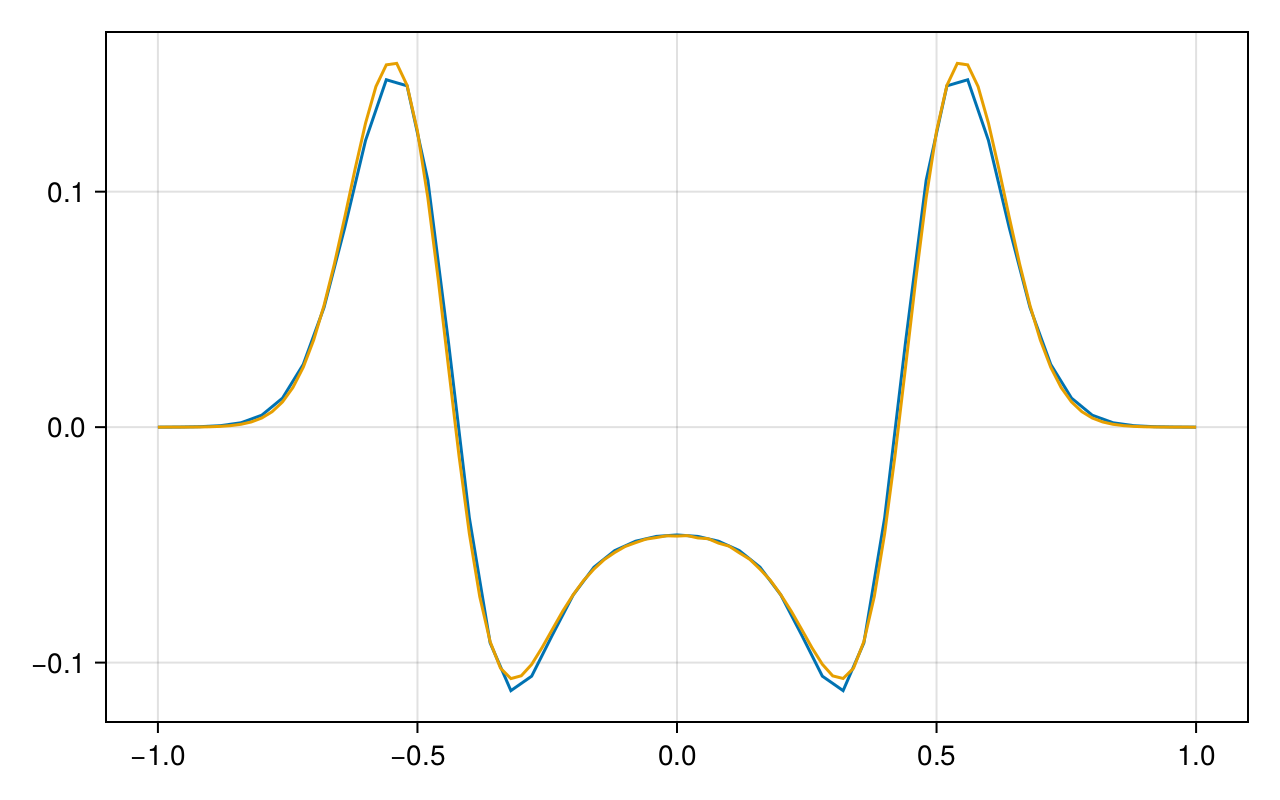

In [7]:
fig = Figure(size=(640, 400))
axis = Axis(fig[1,1])
h0 = 2 / 50
h1 = 2 / 100
lines!(axis, -1:h0:+1, sol0(0.5)[:,(end+1)÷2,1])
lines!(axis, -1:h1:+1, sol1(0.5)[:,(end+1)÷2,1])
fig